# Algoritmos de Regresión

In [ ]:
import pandas as pd
import numpy as np

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import warnings #permite controlar algunos mensajes
import itertools #algunas opciones de iteracion
warnings.filterwarnings("ignore") #ignora mensajes de advertencia

In [ ]:
df_wine = pd.read_csv('./Data/winequality-red.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [4]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality', ylabel='Density'>

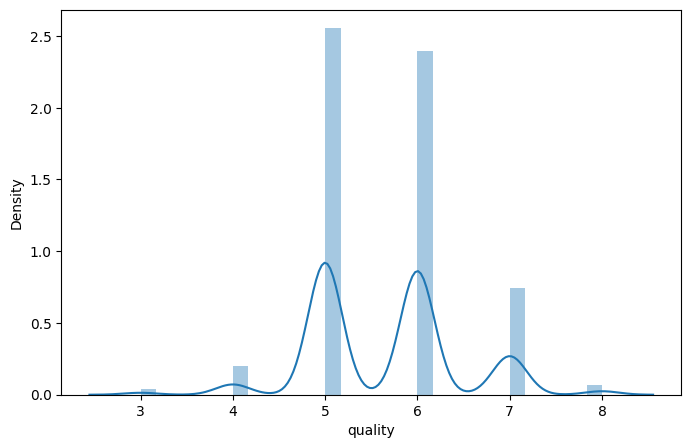

In [5]:
plt.figure(figsize=(8,5))
plt.tight_layout()
sns.distplot(df_wine['quality'])

In [6]:
X= df_wine[list(df_wine.columns)[:-1]]#se excluye la columna 'quality'
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2


In [7]:
Y= df_wine['quality']
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [8]:
#dividir conjunto train/test
x_train,x_test,y_train,y_test = train_test_split(X, Y, train_size=0.8, random_state=42) 
#train_size=0.8, 80% para train y 20% para test
#random_state o "semilla" hace que no se modifique el indice, se mantenga el orden

In [9]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23,81,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40,165,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6,14,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16,23,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11,54,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5,10,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25,60,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15,85,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7,15,0.99458,3.32,0.80,11.9


In [10]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.560,0.08,2.50,0.114,14,46,0.99710,3.24,0.66,9.6
124,7.8,0.500,0.17,1.60,0.082,21,102,0.99600,3.39,0.48,9.5
350,10.7,0.670,0.22,2.70,0.107,17,34,1.00040,3.28,0.98,9.9
682,8.5,0.460,0.31,2.25,0.078,32,58,0.99800,3.33,0.54,9.8
1326,6.7,0.460,0.24,1.70,0.077,18,34,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1259,6.8,0.640,0.00,2.70,0.123,15,33,0.99538,3.44,0.63,11.3
1295,6.6,0.630,0.00,4.30,0.093,51,78,0.99558,3.20,0.45,9.5
1155,8.3,0.600,0.25,2.20,0.118,9,38,0.99616,3.15,0.53,9.8
963,8.8,0.270,0.39,2.00,0.100,20,27,0.99546,3.15,0.69,11.2


In [11]:
y_train

493     6
354     6
342     6
834     5
705     5
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: quality, Length: 1279, dtype: int64

In [12]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
1259    6
1295    5
1155    5
963     6
704     4
Name: quality, Length: 320, dtype: int64

In [13]:
#ENTRENAR el modelo
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
#coeficientes que muestran modelo de regresión definida
coef_dfwine = pd.DataFrame(regressor.coef_,X.columns,columns=['Coeficiente'])
coef_dfwine

,Coeficiente
fixed acidity,0.023050
volatile acidity,-1.001143
citric acid,-0.140595
residual sugar,0.006538
chlorides,-1.806930
free sulfur dioxide,0.005648
total sulfur dioxide,-0.003649
density,-10.327524
pH,-0.393980
sulphates,0.841123


In [15]:
#predicciones sobre conjunto prueba
y_pred = regressor.predict(x_test)

In [16]:
y_pred

array([5.34662579, 5.05612877, 5.66454589, 5.46482041, 5.72528899,
       5.27956579, 5.03391664, 5.12625499, 5.74534691, 5.68676556,
       6.13963111, 5.23380522, 5.55000847, 5.25848801, 5.44822329,
       6.46824261, 5.15003973, 5.59097519, 6.55602612, 5.32250756,
       5.39170757, 5.19612281, 5.94472212, 6.36194351, 5.35479815,
       5.41906947, 6.36460135, 5.35108692, 5.17232805, 6.1696428 ,
       5.25257267, 5.5064243 , 5.75421068, 5.3910392 , 5.45335129,
       5.0273763 , 6.16180768, 5.68658464, 5.64857907, 6.16547153,
       5.52873951, 5.24390451, 6.17723408, 5.16469618, 5.87598434,
       5.81311955, 6.41971811, 5.60590662, 5.15231399, 5.55631728,
       5.16031366, 5.10440702, 5.58364674, 6.33395517, 4.95113286,
       4.98337254, 6.01049784, 5.40789754, 5.83808223, 5.24873876,
       5.60714302, 5.96620494, 5.27627467, 5.3036512 , 6.49500637,
       5.42048902, 6.34267405, 5.24598776, 6.41308344, 5.31238002,
       6.417413  , 4.74301773, 5.79365491, 5.82840259, 6.17602

   # RMSE

In [17]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE:  0.6245119738454893


# MAE

In [18]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))

MAE:  0.503520047372293


# Coeficiente determinación R 2

In [19]:
print('Coeficiente de determinación R: ',regressor.score(X,Y)) #ojo, se hace para todo el conjunto, es decir, para x, y

Coeficiente de determinación R:  0.35966890043628674


# Gráfico Predicho vs Real

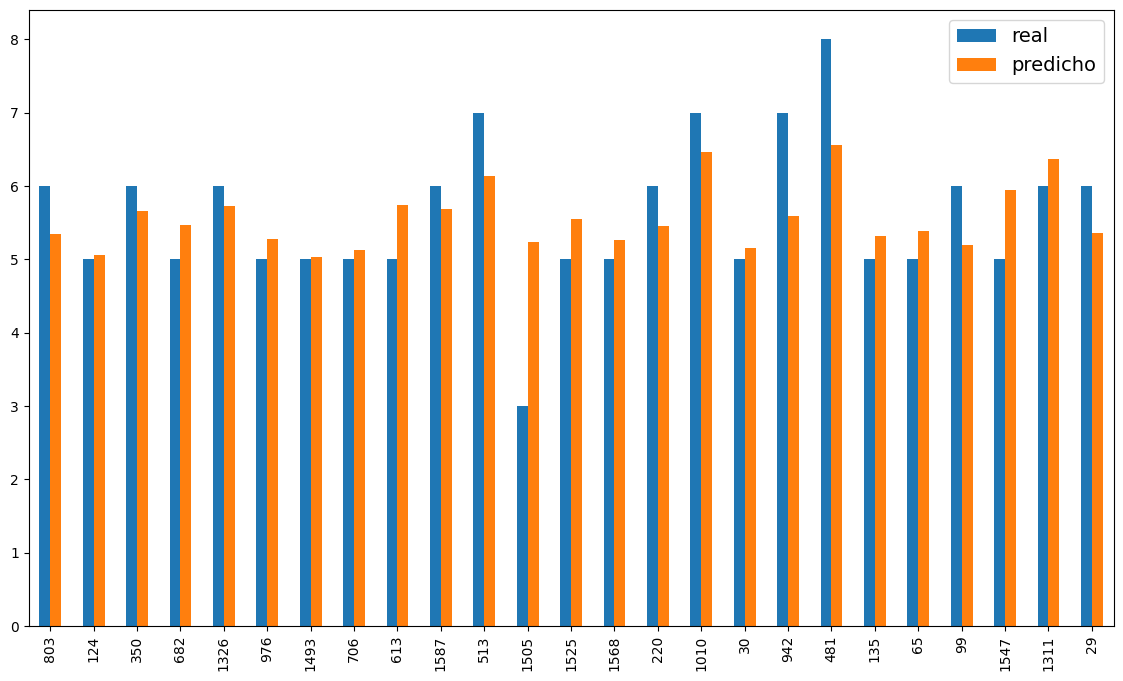

In [21]:
df = pd.DataFrame({'real':y_test,'predicho': y_pred})
df1 = df.head(25) #seleccionamos los 25 primeros valores
df1.plot(kind='bar',figsize=(14,8))
plt.legend(loc=1, prop={'size':14})
plt.show()

In [22]:
df1

,real,predicho
803,6,5.346626
124,5,5.056129
350,6,5.664546
682,5,5.464820
1326,6,5.725289
976,5,5.279566
1493,5,5.033917
706,5,5.126255
613,5,5.745347
1587,6,5.686766


In [23]:
y_evaluation = regressor.predict([[7.4,	0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4]]) #estos datos fueron copiados de la primera fila de la celda 6
print(int(y_evaluation))

5
